In [9]:
# Import libraries
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [10]:
 # Optional: handle XGBoost import
 try:
    import xgboost as xgb
    xgb_installed = True
 except ImportError:
    print("XGBoost not found. Skipping XGBoost section.")
    xgb_installed = False

In [11]:
 # Download NLTK resources
 nltk.download('stopwords')
 nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\HP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\HP/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Load datasets (adjusted paths)
train = pd.read_csv(r'C:\Users\HP\Desktop\TINA\xy_train.csv')
test = pd.read_csv(r'C:\Users\HP\Desktop\TINA\x_test.csv')

In [3]:
import pandas as pd

In [5]:
 # Define correct text column
 title_column = 'text'

In [7]:
 # If test labels are missing, create dummy labels (only for prediction, not evaluation)
 if 'label' not in test.columns:
    test['label'] = 0  # placeholder; won't affect prediction

In [13]:
 # Initialize NLP tools
 stop_words = set(stopwords.words('english'))
 lemmatizer = WordNetLemmatizer()

In [10]:
import stopwords

In [12]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [14]:
 # Preprocessing function
 def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    return ' '.join([lemmatizer.lemmatize(word) for word in words if 
word not in stop_words])


In [18]:
# Apply cleaning
train['clean_text'] = train[title_column].apply(clean_text)
test['clean_text'] = test[title_column].apply(clean_text)

In [17]:
import re

In [22]:
 # TF-IDF vectorization
 vectorizer = TfidfVectorizer(max_features=5000)
 X_train = vectorizer.fit_transform(train['clean_text'])
 X_test = vectorizer.transform(test['clean_text'])

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train['clean_text'])
X_test = vectorizer.transform(test['clean_text'])


In [24]:
 y_train = train['label']
 y_test = test['label']

In [31]:
 # Logistic Regression
 lr_model = LogisticRegression()
 lr_model.fit(X_train, y_train)
 lr_preds = lr_model.predict(X_test)
 print("\nLogistic Regression Accuracy:", accuracy_score(y_test, 
lr_preds))
 print("Logistic Regression Report:\n", classification_report(y_test, 
lr_preds))


Logistic Regression Accuracy: 0.5203680468423254
Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      0.52      0.68     11955
           1       0.00      0.00      0.00         0

    accuracy                           0.52     11955
   macro avg       0.50      0.26      0.34     11955
weighted avg       1.00      0.52      0.68     11955



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [26]:
from sklearn.linear_model import LogisticRegression


In [27]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)


In [29]:
from sklearn.metrics import accuracy_score, classification_report


In [35]:
 # Random Forest
 rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
 rf_model.fit(X_train, y_train)
 rf_preds = rf_model.predict(X_test)
 print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_preds))
 print("Random Forest Report:\n", classification_report(y_test, 
rf_preds))


Random Forest Accuracy: 0.5199498117942284
Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      0.52      0.68     11955
           1       0.00      0.00      0.00         0

    accuracy                           0.52     11955
   macro avg       0.50      0.26      0.34     11955
weighted avg       1.00      0.52      0.68     11955



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [33]:
from sklearn.ensemble import RandomForestClassifier


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


In [41]:
# XGBoost (optional)
if xgb_installed:
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, 
eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    xgb_preds = xgb_model.predict(X_test)
    print("\nXGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
    print("XGBoost Report:\n", classification_report(y_test, 
xgb_preds))

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:09:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.44700961940610623
XGBoost Report:
               precision    recall  f1-score   support

           0       1.00      0.45      0.62     11955
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.45     11955
   macro avg       0.33      0.15      0.21     11955
weighted avg       1.00      0.45      0.62     11955



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [39]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:07:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [40]:
try:
    import xgboost as xgb
    xgb_installed = True
except ImportError:
    xgb_installed = False

if xgb_installed:
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    xgb_preds = xgb_model.predict(X_test)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:07:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [44]:
 # ROC Curve
 lr_probs = lr_model.predict_proba(X_test)[:, 1]
 rf_probs = rf_model.predict_proba(X_test)[:, 1]
 plt.figure(figsize=(8, 6))
 fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
 plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
 fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
 if xgb_installed:
    xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
 plt.plot([0, 1], [0, 1], 'k--')
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('ROC Curve - Fake News Detection')
 plt.legend()
 plt.grid(True)
 plt.show()

NameError: name 'roc_curve' is not defined

<Figure size 800x600 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


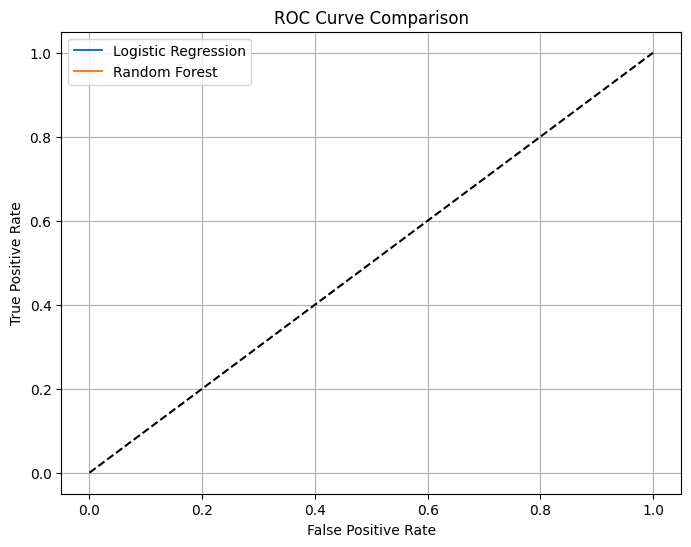

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example for Logistic Regression and Random Forest
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()
